In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Importamos los datos.
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [48]:
# Agregamos la columna [overweight].
# Agregamos el indice de masa corporal (BMI) y marcar si la persona tiene sobrepeso o no.
df['overweight'] = (df['weight'] / ((df['height'] / 100 ) ** 2) > 25).astype(int)

    # df['weight'] / ((df['height'] / 100) ** 2) - Calcula el indice de masa corporal.

    # > 25 - Calculamos si es mayor de 25, que es el indice utilizado comunmente para indicar el sobrepeso.
    
    # .astype(int) - Convertimos el resultado en un tipo de dato entero. El resultado de la comparacion sera true o false y lo convertimos a 1 o 0.

In [49]:
# Normalizamos los datos para [cholesterol] y [gluc] glucosa. 
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

    # Modifican las columnas 'cholesterol' y 'gluc' de tal manera que cualquier valor igual a 1 se convierte en 0, y cualquier valor mayor que 1 se convierte en 1. 
    
    # Esto es común en análisis de datos para convertir datos categóricos binarios en un formato más estandarizado donde 0 generalmente representa 
    # "bueno" o "normal" y 1 representa "malo" o "anormal".

In [50]:
# Convertir el conjunto de datos en un formato largo (Long format).
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # pd.melt() - Esta función de Pandas se utiliza para transformar un DataFrame en un formato largo (long format). En el formato largo, 
    # las columnas del DataFrame se convierten en filas y se crean nuevas columnas para almacenar los nombres de las columnas originales 
    # y sus valores. Esto es útil para representar datos categóricos y realizar análisis más eficaces.

    # id_vars=['cardio'] - En esta parte, se especifica la(s) columna(s) que se mantendrán sin cambios en el formato largo. En este caso, la columna 'cardio' 
    # se mantendrá sin cambios, lo que significa que se convertirá en una columna en el nuevo DataFrame y sus valores se mantendrán igual.    

    # value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'] - Aquí se especifican las columnas que se transformarán en formato largo. 
    # Estas son las columnas que se incluirán en el nuevo DataFrame y se apilarán verticalmente. En este caso, se incluyen las columnas 'cholesterol', 'gluc', 
    # 'smoke', 'alco', 'active' y 'overweight'. Sus valores se agruparán en una sola columna llamada "value," y se creará una nueva columna llamada "variable" 
    # que contendrá los nombres originales de las columnas.

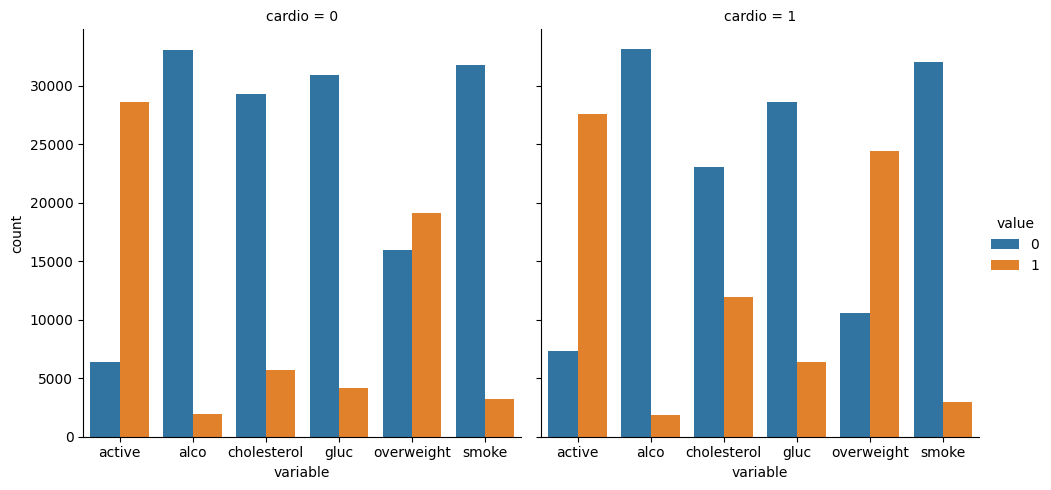

In [51]:
# Crear un grafico de barras utilizando seaborn con catplot()
fig = sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio')

    # kind='count' - Esto especifica el tipo de gráfico categórico que se va a crear, en este caso, un gráfico de conteo. Un gráfico de conteo mostrará cuántas 
    # instancias hay de cada valor en la columna 'variable' para cada valor en la columna 'value'.

    # x='variable' - Esta parte especifica que la variable que se usará en el eje x del gráfico será la columna 'variable' de df_cat. En otras palabras, las categorías 
    # del gráfico estarán en el eje x.

    # hue='value' - La columna 'value' de df_cat se utiliza como un factor para agrupar los datos. En este caso, se mostrarán diferentes colores para los valores de 'value', 
    # lo que permite comparar las distribuciones de los valores en la columna 'variable' para cada valor de 'value'.

    # col='cardio' - Esta parte separa el gráfico en columnas (subgráficos) según los valores de la columna 'cardio'. Cada subgráfico mostrará el conteo de las categorías en 
    # la columna 'variable' para un valor específico de 'cardio' (0 o 1).

# Podemos guardar la figura en un documento aparte
fig.savefig('catplot.png')

In [52]:
# Limpiar el conjunto de datos, eliminando segmentos anomalos o incorrectos bajo ciertos criterios.
df_clean = df[(df['ap_lo'] <= df['ap_hi']) &
              (df['height'] >= df['height'].quantile(0.025)) &
              (df['height'] <= df['height'].quantile(0.975)) &
              (df['weight'] >= df['weight'].quantile(0.025)) &
              (df['weight'] <= df['weight'].quantile(0.975))]

    # df_clean = df[(df['ap_lo'] <= df['ap_hi']) - Esto filtra las filas del DataFrame donde la presión diastólica (ap_lo) es menor o igual que la presión sistólica (ap_hi). 
    # Esta condición descarta las mediciones de presión arterial que son anómalas, ya que la presión diastólica generalmente debe ser menor que la sistólica.

    # (df['height'] >= df['height'].quantile(0.025)) - Esto filtra las filas donde la altura (height) es mayor o igual que el percentil 2.5 de las alturas en el conjunto de datos. 
    # Esto se hace para eliminar valores de altura extremadamente bajos, que podrían ser datos incorrectos o atípicos.

    # (df['height'] <= df['height'].quantile(0.975)) - Este filtro garantiza que la altura sea menor o igual que el percentil 97.5 de las alturas. De esta manera, se eliminan valores 
    # de altura extremadamente altos que también pueden ser datos incorrectos.

    # (df['weight'] >= df['weight'].quantile(0.025)) - Similar al filtro de altura, esto asegura que el peso (weight) sea mayor o igual que el percentil 2.5 de los pesos en el conjunto 
    # de datos. Se eliminan valores de peso extremadamente bajos.

    # (df['weight'] <= df['weight'].quantile(0.975)) - Por último, esto limita el peso a ser menor o igual que el percentil 97.5 de los pesos en el conjunto de datos, eliminando valores 
    # de peso extremadamente altos.

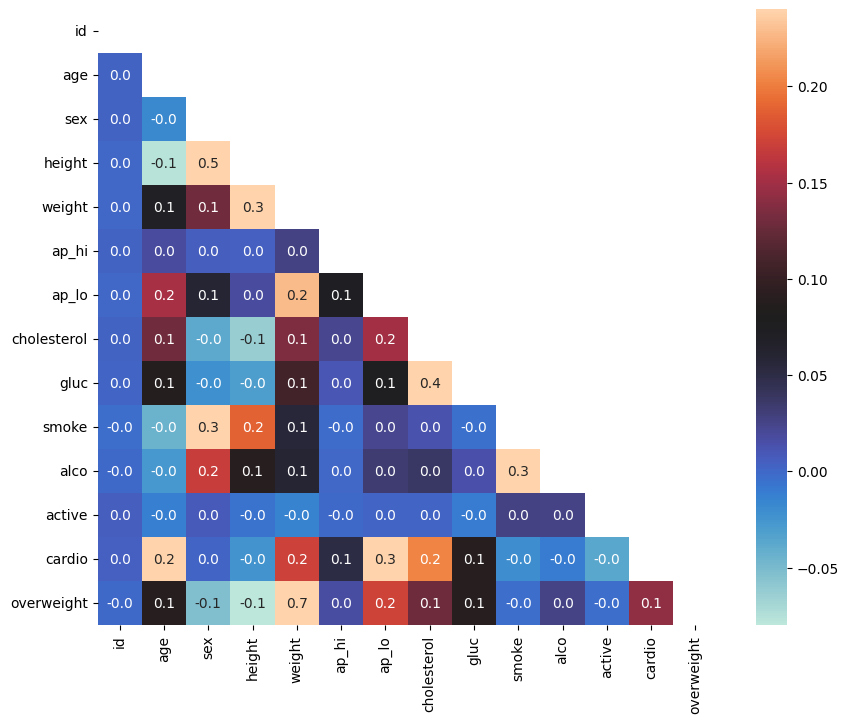

In [53]:
# Crear una matriz de correlacion y hacerla grafica, a partir del dataframe limpiado anteriormente
correlation = df_clean.corr()

    # Calcula la matriz de correlación de Pearson entre las columnas de df_clean. La matriz de correlación muestra cómo están relacionadas las variables entre sí. 
    # Cada entrada en la matriz representa el coeficiente de correlación entre dos variables. Un valor cercano a 1 indica una fuerte correlación positiva, un valor 
    # cercano a -1 indica una fuerte correlación negativa y un valor cercano a 0 indica una correlación débil o nula.

mask = np.triu(np.ones_like(correlation, dtype=bool))

    # Se crea una máscara para ocultar la mitad superior de la matriz de correlación. Esto se hace para evitar redundancia en la visualización, ya que la matriz de 
    # correlación es simétrica y la mitad superior es un reflejo de la mitad inferior. La máscara se crea utilizando np.triu() y np.ones_like(), donde se configura 
    # en True para la mitad superior y False para la mitad inferior.

fig, ax = plt.subplots(figsize=(10,8))

    # Se crea una figura y un eje para el gráfico de mapa de calor con un tamaño específico
    
sns.heatmap(correlation, mask=mask, annot=True, fmt=".1f", cmap='icefire', vmin=-0.08, vmax=0.24)

    # Se utiliza Seaborn para generar el gráfico de mapa de calor. Se pasa la matriz de correlación corr como datos, la máscara mask para ocultar la mitad superior, 
    # se habilitan las anotaciones con annot=True para mostrar los valores en las celdas y se configura el formato de anotación en ".1f" para mostrar un decimal. 
    # Además, se establece el mapa de colores con cmap='coolwarm' y se limita el rango de valores de color con vmin y vmax, lo que hace que los valores fuera de este 
    # rango se muestren en el mismo color.
    
# Podemos guardar la figura en un documento aparte 
fig.savefig('heatmap.png')
